In [110]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df = sns.load_dataset('planets')

In [8]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [10]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [11]:
df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [12]:
df.shape

(1035, 6)

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
df['number'].value_counts()

1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: number, dtype: int64

In [15]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [16]:
df.head(2)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


In [25]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [43]:
df['orbital_period'] = df['orbital_period'].fillna(df['orbital_period'].mode()[0])

In [36]:
df['mass'].mode()

0    1.8
1    1.9
Name: mass, dtype: float64

In [53]:
df['mass'] = df['mass'].fillna(df['mass'].mode()[0])

In [29]:
df['orbital_period'].mean()

2002.9175960947584

In [35]:
df['orbital_period'].mode()

0     123.0
1     428.5
2     883.0
3    1845.0
Name: orbital_period, dtype: float64

In [45]:
df['distance'].mode()

0    780.0
Name: distance, dtype: float64

In [54]:
df['distance'] = df['distance'].fillna(df['distance'].mode()[0])

In [55]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [96]:
x = df[['number', 'orbital_period', 'mass','year']]

In [97]:
y = df['distance']

In [98]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=100)

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
encoder = StandardScaler()

In [100]:
x_train = encoder.fit_transform(x_train)
x_train

array([[ 0.16807647, -0.05131912, -0.50536603,  0.21802527],
       [ 0.16807647, -0.06634989, -0.16209276, -1.53651289],
       [ 0.95854523,  0.01501606, -0.20591488,  0.71932189],
       ...,
       [-0.62239228, -0.01421281,  0.21039525, -1.03521628],
       [ 0.16807647, -0.08118799, -0.80299125, -0.03262304],
       [-0.62239228, -0.08132603, -0.16209276,  0.9699702 ]])

In [101]:
y_train = encoder.transform(y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[7.4790e+01 2.7460e+01 4.7300e+01 5.2850e+01 6.0600e+00 3.5890e+01
 1.3800e+02 7.8000e+02 7.8000e+02 5.8170e+01 1.2000e+03 3.3330e+01
 8.8200e+00 1.0340e+01 7.8000e+02 7.8000e+02 7.7200e+03 7.8000e+02
 4.5500e+02 1.5710e+01 6.7610e+01 3.0500e+01 4.7000e+02 8.7000e+02
 7.8000e+02 3.0300e+02 4.2480e+01 3.3480e+01 5.2030e+01 1.5890e+01
 2.1300e+01 7.8000e+02 1.8939e+02 8.5200e+00 1.4700e+02 7.7000e+02
 5.5930e+01 1.7600e+03 7.8000e+02 4.9330e+01 7.8000e+02 5.5930e+01
 9.7660e+01 7.8000e+02 1.3495e+02 2.1400e+02 4.4460e+01 2.9000e+02
 3.6000e+02 2.6950e+01 1.1521e+02 4.4980e+01 3.7880e+01 2.1000e+03
 9.7280e+01 3.8010e+01 7.8000e+02 1.9890e+01 1.6892e+02 7.8000e+02
 2.5540e+01 5.4200e+02 7.8000e+02 1.2870e+01 1.2830e+01 7.0100e+00
 7.8000e+02 2.5650e+01 6.3690e+01 1.2830e+01 4.4540e+01 1.5060e+02
 2.9550e+01 4.6340e+01 6.0000e+02 1.3175e+02 7.8000e+02 1.3400e+03
 4.3570e+01 6.0460e+01 1.7990e+01 3.8640e+01 7.8000e+02 1.4500e+02
 7.8000e+02 6.0000e+02 2.1400e+02 1.5000e+03 3.6800e+02 5.9030e+01
 9.1160e+01 4.4050e+01 8.4030e+01 2.9940e+01 7.8000e+02 4.0850e+01
 3.9390e+01 3.3000e+02 7.8000e+02 5.0180e+01 4.0000e+02 1.0600e+03
 7.8000e+02 7.8000e+02 1.1062e+02 4.6930e+01 7.8000e+02 1.6820e+01
 2.9000e+02 3.0769e+02 6.6890e+01 5.9030e+01 7.8000e+02 1.4000e+02
 3.6020e+01 7.8000e+02 7.8000e+02 7.8000e+02 1.4000e+03 3.4300e+02
 3.9390e+01 5.3080e+01 2.5870e+01 7.8000e+02 2.0000e+02 2.5590e+01
 7.8000e+02 3.7890e+01 7.8000e+02 1.7620e+01 5.3050e+01 5.2720e+01
 1.1415e+02 4.8950e+01 7.8000e+02 3.6000e+03 4.4050e+01 4.8000e+02
 7.8000e+02 5.8820e+01 5.4920e+01 6.8350e+01 3.8000e+02 9.1570e+01
 1.0300e+03 8.7410e+01 5.6050e+01 7.8000e+02 1.9250e+01 7.8000e+02
 3.7880e+01 6.0000e+02 4.7080e+01 2.2500e+03 2.6150e+01 1.9500e+03
 7.8000e+02 1.7240e+01 1.4500e+02 8.0000e+01 7.4790e+01 4.7000e+00
 3.6800e+02 2.6670e+01 5.9840e+01 4.5520e+01 7.0000e+01 2.1920e+01
 7.8000e+02 4.2520e+01 7.7820e+01 2.0000e+02 4.9700e+03 1.2136e+02
 2.9000e+02 8.0640e+01 7.8000e+02 1.5280e+01 2.0820e+01 1.1070e+03
 7.8000e+02 9.7180e+01 3.2000e+02 1.5280e+01 6.2700e+00 7.8000e+02
 3.6140e+01 7.8000e+02 1.6000e+02 1.4903e+02 2.9300e+02 6.1300e+02
 8.0580e+01 5.5000e+02 1.3900e+02 9.2510e+01 2.2124e+02 8.9130e+01
 3.4500e+02 1.7007e+02 1.3680e+02 5.1260e+01 4.9400e+00 4.3080e+01
 2.0500e+02 3.9390e+01 9.7660e+01 7.8000e+02 2.3000e+02 1.2500e+02
 7.8000e+02 4.5400e+00 6.8540e+01 1.1062e+02 5.7210e+01 1.9000e+02
 6.4980e+01 2.6150e+01 3.0300e+02 5.6920e+01 1.3500e+02 7.8000e+02
 7.8000e+02 2.8940e+01 6.0000e+02 7.8000e+02 2.3000e+02 6.7390e+01
 3.9560e+01 5.0200e+01 1.7350e+01 1.4080e+01 1.6570e+01 2.2200e+02
 7.8000e+02 7.8000e+02 7.8000e+02 7.8000e+02 7.8000e+02 7.8000e+02
 3.2830e+01 7.8000e+02 3.5211e+02 7.8000e+02 7.8000e+02 2.6150e+01
 2.3980e+01 2.2090e+01 7.8000e+02 3.9940e+01 1.3193e+02 7.8000e+02
 6.6490e+01 7.8000e+02 7.8000e+02 1.4970e+01 3.1400e+02 9.9400e+01
 1.7300e+02 1.3200e+02 1.1150e+01 5.2830e+01 7.8000e+02 1.1614e+02
 1.1070e+03 8.1100e+01 2.6910e+01 1.5280e+01 2.1410e+01 7.8000e+02
 3.9390e+01 4.4800e+01 2.3000e+03 7.8000e+02 1.3850e+02 1.7400e+02
 3.4570e+01 7.8000e+02 7.6390e+01 5.0450e+01 4.2880e+01 2.5640e+01
 7.8000e+02 3.9500e+02 7.8000e+02 6.0000e+01 2.6500e+01 7.8000e+02
 7.8000e+02 3.9940e+01 6.1300e+02 3.3240e+01 4.5010e+01 7.8000e+02
 1.7544e+02 1.3072e+02 1.8150e+01 3.2320e+01 1.2788e+02 7.8000e+02
 1.3500e+02 7.8000e+02 1.0560e+03 1.5038e+02 5.5100e+01 4.0570e+01
 7.8000e+02 7.8000e+02 1.9280e+01 1.5100e+01 5.2030e+01 5.6950e+01
 7.8000e+02 7.8000e+02 1.5600e+01 4.7530e+01 5.2830e+01 4.1100e+02
 7.8000e+02 3.0300e+02 4.0800e+03 5.2880e+01 6.3490e+01 5.2720e+01
 2.6520e+01 1.0638e+02 3.5910e+01 2.0000e+02 4.7920e+01 6.2110e+01
 7.8000e+02 7.8000e+02 2.9200e+01 6.7020e+01 3.4070e+01 7.8000e+02
 1.2530e+01 7.8000e+02 7.8000e+02 3.5590e+01 4.0800e+02 1.2136e+02
 2.6910e+01 1.0320e+01 5.0100e+02 7.8000e+02 6.9440e+01 1.3470e+01
 4.2680e+01 1.2530e+01 7.8000e+02 1.1547e+02 1.5500e+02 1.2136e+02
 7.8000e+02 2.0480e+01 7.8000e+02 1.3500e+02 7.8000e+02 1.4925e+02
 6.2660e+01 7.8000e+02 6.8350e+01 2.0000e+02 2.5000e+03 3.9390e+01
 1.2422e+02 1.7000e+02 3.3980e+01 1.3900e+02 4.6730e+01 7.8000e+02
 7.8000e+02 4.3530e+01 4.9000e+01 2.0030e+01 2.8980e+01 1.2580e+01
 7.8000e+02 1.9300e+02 7.7000e+02 2.2000e+02 1.2530e+01 1.6420e+02
 3.3290e+01 8.7870e+01 9.8000e+02 7.8000e+02 7.8000e+02 1.5890e+01
 3.7840e+01 2.8070e+01 2.1520e+01 2.8600e+01 6.2700e+00 5.0430e+01
 2.6210e+01 1.7800e+02 2.0210e+01 1.3470e+01 2.7130e+01 2.9040e+01
 2.7460e+01 7.8000e+02 2.6910e+01 3.2700e+01 7.8000e+02 2.5870e+01
 4.2090e+01 1.4000e+03 4.3030e+01 2.8880e+01 7.8000e+02 2.6000e+02
 1.6600e+02 7.8000e+02 7.8000e+02 3.2580e+01 1.1000e+02 2.1850e+01
 9.4200e+00 4.8000e+02 1.1430e+01 4.3530e+01 7.8000e+02 3.8050e+01
 2.0000e+03 9.4610e+01 7.8000e+02 2.6000e+02 1.1400e+03 7.8000e+02
 3.5000e+01 1.6750e+02 1.4000e+03 7.8000e+02 6.5000e+02 8.0000e+01
 8.8260e+01 3.6800e+02 7.8000e+02 5.6310e+01 7.8000e+02 2.5650e+01
 3.8700e+01 9.8520e+01 5.2830e+01 3.7980e+01 5.9700e+01 7.8000e+02
 7.8000e+02 2.1290e+01 7.3100e+01 3.5370e+01 3.2990e+01 3.9390e+01
 1.7300e+02 3.5800e+01 7.8000e+02 7.8000e+02 7.8000e+02 3.8450e+01
 4.3990e+01 3.8700e+01 6.8000e+00 6.5000e+02 8.1500e+01 4.5230e+01
 8.6880e+01 1.1737e+02 5.0000e+02 8.9850e+01 4.0000e+02 7.8000e+02
 2.1520e+01 2.5700e+01 1.4900e+01 7.8000e+02 7.8000e+02 1.3470e+01
 7.8000e+02 2.2500e+02 9.3200e+01 7.8000e+02 5.1360e+01 7.8000e+02
 6.2700e+00 9.0000e+01 1.2000e+03 7.8000e+02 3.3900e+02 2.6210e+01
 7.8000e+02 7.8000e+02 1.8080e+01 3.3240e+01 2.0980e+01 1.1455e+02
 7.8000e+02 2.5590e+01 7.8000e+02 1.0230e+01 1.8060e+01 6.8000e+02
 1.4000e+02 1.5100e+01 3.1000e+02 2.2040e+01 7.2570e+01 2.2321e+02
 7.8000e+02 7.8000e+02 3.8640e+01 3.4000e+02 7.8000e+02 7.8000e+02
 1.3790e+01 7.8000e+02 4.2430e+01 1.6130e+01 3.6000e+02 6.1000e+01
 8.0000e+02 7.8000e+02 1.2830e+01 3.6000e+01 4.3120e+01 2.4150e+01
 5.2030e+01 2.2380e+01 2.0770e+01 4.7000e+02 4.4800e+01 7.8000e+02
 7.8000e+02 4.7920e+01 2.8760e+01 1.2000e+02 5.0030e+01 3.8700e+02
 2.8300e+02 4.7000e+00 2.5000e+02 3.3240e+01 2.5500e+02 7.8000e+02
 3.0000e+02 2.4050e+01 7.8000e+02 1.2000e+03 7.8000e+02 1.2830e+01
 1.3300e+03 7.8000e+02 5.2880e+01 3.9430e+01 7.8000e+02 6.4560e+01
 7.8000e+02 3.2200e+02 5.7000e+02 4.0750e+01 3.8000e+01 4.2770e+01
 2.0100e+01 6.1300e+02 7.8000e+02 7.8000e+02 2.4200e+02 2.5000e+01
 8.5500e+02 7.8000e+02 4.5520e+01 3.8700e+01 3.2560e+01 4.7000e+00
 7.8000e+02 6.8000e+00 4.6340e+01 1.5280e+01 7.8000e+02 2.6200e+02
 6.6000e+01 7.8000e+02 2.0430e+01 1.2136e+02 1.2755e+02 2.1500e+02
 2.5200e+01 3.8010e+01 1.4080e+01 3.0880e+01 1.5230e+02 7.8000e+02
 7.8000e+02 5.2830e+01 1.4500e+02 3.2620e+01 3.7420e+01 2.8900e+01
 7.8000e+02 7.8000e+02 7.8000e+02 7.8000e+02 5.5310e+01 7.8000e+02
 1.8060e+01 4.6840e+01 3.0030e+02 5.2630e+01 1.9720e+01 8.0060e+01
 1.3300e+03 1.3850e+02 3.0300e+02 1.4560e+01 1.0000e+03 1.6130e+01
 1.1800e+03 3.8520e+01 5.5010e+01 1.3470e+01 5.4920e+01 2.4150e+01
 7.8000e+02 4.2990e+01 1.5360e+01 7.8000e+02 6.5620e+01 2.3100e+01
 4.2680e+01 3.3900e+02 1.0549e+02 2.8040e+01 3.7160e+01 4.7300e+01
 7.8000e+02 5.3820e+01 7.8000e+02 3.3300e+02 7.8000e+02 3.7780e+01
 3.1700e+02 5.2880e+01 9.0400e+00 7.8000e+02 7.8000e+02 6.0600e+00
 2.8040e+01 4.2000e+01 8.0000e+02 5.1870e+01 5.1810e+01 7.8000e+02
 5.2800e+01 1.0204e+02 5.2830e+01 7.8000e+02 3.8020e+01 3.6000e+02
 7.8000e+02 7.8000e+02 4.4150e+01 1.4000e+02 7.8000e+02 7.8250e+01
 1.4085e+02 5.6000e+02 1.2830e+01 7.8000e+02 3.7540e+01 1.1030e+01
 7.8000e+02 2.3800e+01 7.8000e+02 7.8000e+02 2.5400e+02 1.5000e+03
 7.8000e+02 5.6500e+01 1.3072e+02 7.8000e+02 3.6800e+02 1.8390e+01
 7.8000e+02 3.5400e+02 2.0400e+02 7.8000e+02 2.2800e+02 1.8282e+02
 4.3400e+01 1.0000e+02 1.3280e+02 1.6450e+03 1.3141e+02 3.9940e+01
 9.0330e+01 6.8000e+00 9.6990e+01 2.9760e+01 5.3500e+02 1.4080e+01
 7.7400e+01 7.8000e+02 7.8000e+02 1.4560e+01 3.5590e+01 5.3050e+01
 7.8000e+02 7.6900e+00 1.4800e+02 1.2530e+01 1.6500e+02 7.8000e+02
 5.0000e+01 5.5310e+01 3.1790e+01 7.8000e+02 1.5710e+01 7.8000e+02
 8.5000e+03 4.4700e+02 5.1970e+01 3.9300e+02 7.8000e+02 7.8000e+02
 2.1190e+03 2.5590e+01 7.8000e+02 4.0800e+03 4.1270e+01 5.3820e+01
 7.8000e+02 5.4710e+01 3.5400e+02 9.2510e+01 1.8000e+02 1.7990e+01
 3.3460e+01 1.0846e+02 7.8000e+02 1.9840e+01 4.7260e+01 7.8000e+02
 9.0000e+01 7.8000e+02 1.3500e+02 4.3030e+01 1.4000e+03 5.6920e+01
 7.0420e+01 6.8000e+00 7.8000e+02 4.9200e+02 1.9720e+01 1.1947e+02
 4.8430e+01 6.6000e+01 7.8000e+02 8.7700e+00 7.8000e+02 1.2107e+02
 7.8000e+02 7.8000e+02 6.1300e+02 3.8990e+01 7.8000e+02 7.5600e+03
 5.6180e+01 7.8000e+02 3.0000e+02 7.8000e+02 3.1120e+01 5.5040e+01
 4.2090e+01 7.8000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [102]:
y_train

10      74.79
374     27.46
580     47.30
228     52.85
263      6.06
        ...  
802    780.00
53      31.12
350     55.04
79      42.09
792    780.00
Name: distance, Length: 776, dtype: float64

In [103]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((776, 4), (259, 4), (776,), (259,))

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [105]:
model.fit(x_train,y_train)

LinearRegression()

In [111]:
model.score(x,y)

-349375.3709281292

In [107]:
model.intercept_

378.75408505154894

In [108]:
model.coef_

array([-23.63106756,   6.58079509,   4.6132369 , 176.09874261])

In [113]:
predict = model.predict(x_test)

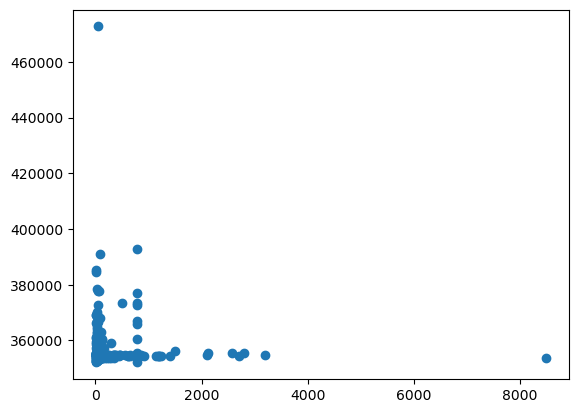

In [115]:
plt.scatter(y_test,predict)

In [117]:
#error

residuals = y_test - predict


826    -354137.044007
917    -353294.744835
213    -356966.997848
270    -354788.631732
1022   -354590.047065
            ...      
184    -354276.881036
103    -353190.510260
100    -354312.778107
615    -356137.027578
966    -354288.590326
Name: distance, Length: 259, dtype: float64

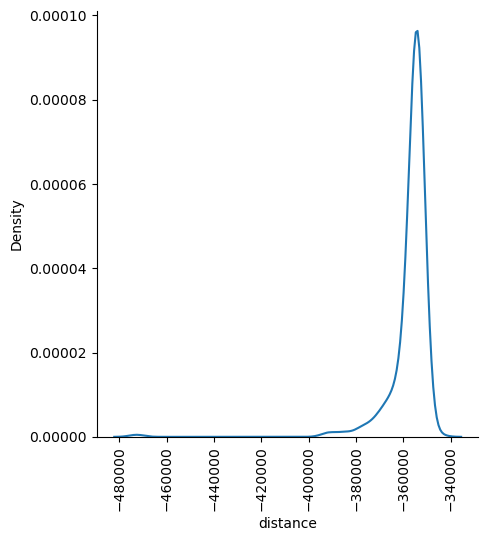

In [121]:
sns.displot(residuals,kind='kde')
plt.xticks(rotation=90)
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  1035 non-null   float64
 3   mass            1035 non-null   float64
 4   distance        1035 non-null   float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [131]:
from sklearn.preprocessing import LabelEncoder

labe = LabelEncoder()

In [134]:
df_label = df.copy()

In [172]:
df_label.head()

,method,number,orbital_period,mass,distance,year
0,7,0,646,328,321,14
1,7,0,802,244,282,16
2,7,0,786,258,67,19
3,7,0,664,376,365,15
4,7,0,738,354,373,17


In [174]:
df_label['distance'].value_counts()

511    234
506      6
462      6
29       6
7        6
      ... 
357      1
59       1
171      1
76       1
458      1
Name: distance, Length: 552, dtype: int64

In [149]:
df_label = df_label.apply(LabelEncoder().fit_transform)

In [150]:
df_label.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [151]:
X = df_label[['method', 'number', 'orbital_period', 'mass','year']]

In [153]:
Y = df_label['distance']

In [154]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=100)

In [155]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((776, 5), (259, 5), (776,), (259,))

In [152]:
X

,method,number,orbital_period,mass,year
0,7,0,646,328,14
1,7,0,802,244,16
2,7,0,786,258,19
3,7,0,664,376,15
4,7,0,738,354,17
...,...,...,...,...,...
1030,8,0,183,224,14
1031,8,0,79,224,15
1032,8,0,123,224,15
1033,8,0,197,224,16


In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [157]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [160]:
lr.score(X,Y)

0.21739130434782608

In [161]:
lr.coef_

array([[ 0.00518467, -0.00039321,  0.01243428, -0.03154147,  0.010173  ],
       [ 0.0115612 ,  0.00943157,  0.01040673, -0.01264483,  0.01045837],
       [-0.00347529, -0.00180908,  0.02337643, -0.07274104, -0.01032926],
       ...,
       [-0.00448281, -0.0008799 ,  0.00137125,  0.01347691,  0.00579976],
       [-0.00447927, -0.00087912,  0.00138743,  0.01350665,  0.00459965],
       [ 0.00215551, -0.00042337, -0.05537668,  0.05678203, -0.00047473]])

In [162]:
lr.intercept_

array([ 7.30609567e-04,  1.53447364e-03, -5.50868304e-04,  4.17354504e-04,
        1.43863583e-03,  4.47146218e-04, -3.77787395e-04, -5.63581048e-04,
        2.44801954e-04, -4.23488781e-04, -2.51726622e-04,  6.01264505e-04,
        5.61902311e-04,  2.03717926e-04, -2.30560047e-04, -2.63680897e-04,
        2.43255591e-04,  9.18860615e-05,  1.20806826e-05,  1.88108076e-03,
        5.73965306e-04,  1.18776590e-03, -1.69543933e-04,  2.52058938e-04,
       -2.82740309e-04, -8.51322843e-04,  5.07203755e-04, -1.33119866e-05,
        5.72758506e-04, -5.65982265e-04,  1.22224035e-04,  6.35105498e-04,
       -1.57813721e-04, -3.30192795e-04,  5.83297119e-05,  1.11946192e-03,
       -1.39078059e-04,  7.00054938e-04, -9.31760259e-05, -3.01284734e-04,
       -1.43610889e-04, -1.29332506e-04, -7.76202405e-04,  3.41190491e-04,
       -4.70790247e-04,  1.40746685e-05,  2.18254254e-04, -5.36725206e-04,
        3.78115093e-05, -2.92877581e-04,  2.93282822e-04, -5.14904773e-04,
        7.44226435e-05, -

In [166]:
PREDICT = lr.predict(X_test)

In [171]:
#Residual

error_ = Y_test - PREDICT

error_

826       0
917       0
213    -231
270     -56
1022   -163
       ... 
184     -60
103      13
100     -17
615    -179
966    -176
Name: distance, Length: 259, dtype: int64

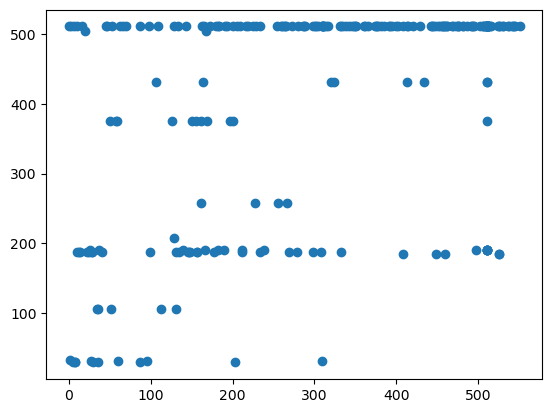

In [170]:
plt.scatter(Y_test, PREDICT)